In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
path = 'C:/Users/User/Desktop/MIT/Logistic Regression/heart disease prediction/data/'

In [3]:
filename = 'framingham.csv'

In [4]:
chd = pd.read_csv(path+filename)
chd.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
chd = chd.fillna(chd.mean())

In [6]:
y = chd['TenYearCHD']
x = chd.drop(columns=['TenYearCHD'])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

building the model

In [8]:
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [9]:
model = sm.Logit(y_train, x_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.381034
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2756
Model:                          Logit   Df Residuals:                     2740
Method:                           MLE   Df Model:                           15
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.1125
Time:                        14:35:01   Log-Likelihood:                -1050.1
converged:                       True   LL-Null:                       -1183.2
Covariance Type:            nonrobust   LLR p-value:                 5.729e-48
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.8396      0.831     -9.438      0.000      -9.468      -6.212
male          

In [10]:
model = LogisticRegression()

In [11]:
model.fit(x_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

making predicitons

In [12]:
y_pred = model.predict(x_test)

In [13]:
#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
accuracy 

0.8530997304582211

generating confusion matrix

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1259,    5],
       [ 213,    7]], dtype=int64)

our model predicts good TP values but not good at FN

In [22]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1264
           1       0.58      0.03      0.06       220

    accuracy                           0.85      1484
   macro avg       0.72      0.51      0.49      1484
weighted avg       0.81      0.85      0.79      1484



precision = tp / (tp + fp)  the ability of the classifier not to label as positive a sample that is negative.
// recall = tp / (tp + fn) the ability of the classifier to find all the positive samples.

In [24]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.51


In [23]:
FP, TP, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(FP, TP)

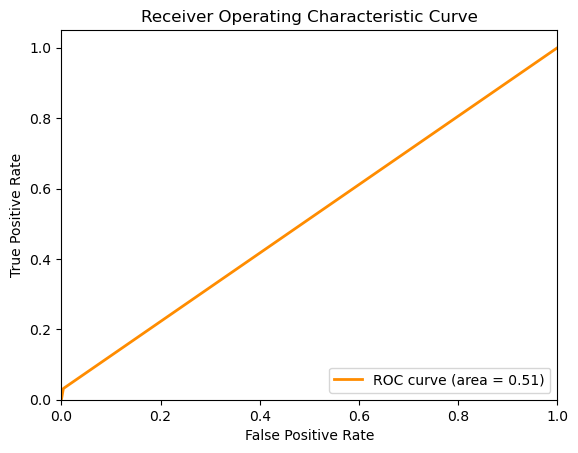

In [25]:
plt.figure()
plt.plot(FP, TP, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

With an AUC 51% our model is like a bet and should be improved